In [17]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt
np.random.seed(seed = 25)

In [18]:
# create 2 gaussians

normal1_mean = [-2, -2]
normal1_cov = [[1, 0], [0, 1]]
num_normal1_samples = 10
normal1 = np.random.multivariate_normal(mean=normal1_mean, cov=normal1_cov, size=num_normal1_samples)

normal2_mean = [2,2]
normal2_cov = [[1, 0], [0, 1]]
num_normal2_samples = 10
normal2 = np.random.multivariate_normal(mean=normal2_mean, cov=normal2_cov, size=num_normal2_samples)


In [19]:
# create a fully labeled dataset (for Part I)
X = np.concatenate((normal1,normal2),axis = 0)
print(X.shape)
y = np.array(num_normal1_samples*[1])
y = np.concatenate((y,np.array(num_normal2_samples*[2])))
print(y.shape)

(20, 2)
(20,)


In [20]:
num_labeled_pts_per_cluster = 1
# create labeled y array
y_L = np.array(num_labeled_pts_per_cluster*[1])
y_L = np.concatenate((y_L,np.array(num_labeled_pts_per_cluster*[2])),axis = 0)
print(y_L)

# create labeled X array
# select points from each gaussian to be labeled points
rng = np.random.default_rng()
rand_inds_1 = rng.choice(num_normal1_samples, num_labeled_pts_per_cluster, replace=False)
X_L = normal1[rand_inds_1,:]
rand_inds_2 = rng.choice(num_normal2_samples, num_labeled_pts_per_cluster, replace=False)
X_L = np.concatenate((X_L,normal2[rand_inds_2,:]))
print(X_L)

# create unlabeled array
X_U = normal1.copy()
X_U = np.delete(X_U,rand_inds_1,axis = 0)
X_temp = normal2.copy()
X_temp = np.delete(X_temp,rand_inds_2,axis = 0)
X_U = np.concatenate((X_U,X_temp),axis = 0)
print(X_U.shape)

[1 2]
[[-4.05323076 -1.13141695]
 [ 2.53333982  1.70913029]]
(18, 2)


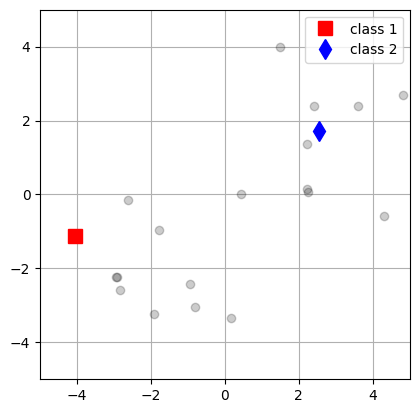

In [21]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')

plt.grid()
plt.legend()

C:\Users\krisr\AppData\Local\Temp\ipykernel_6084\4217746639.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[:9,0], X[:9,1], 'rs', marker='o')
C:\Users\krisr\AppData\Local\Temp\ipykernel_6084\4217746639.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[10:17,0], X[10:17,1], 'bs', marker='o')


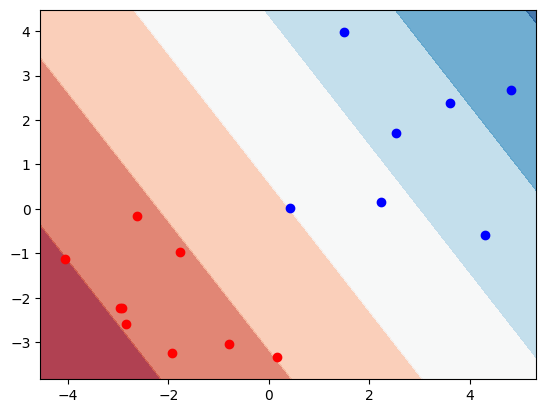

In [22]:
# Part I - Find classifier using fully labeled data (i.e. X,y)
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

classifier = SVC(kernel="linear", C=0.025, random_state=42)

classifier.fit(X,y)
ax = plt.subplot()
cm = plt.cm.RdBu
DecisionBoundaryDisplay.from_estimator(
            classifier, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

ax.plot(X[:9,0], X[:9,1], 'rs', marker='o')
ax.plot(X[10:17,0], X[10:17,1], 'bs', marker='o')
plt.show()

C:\Users\krisr\AppData\Local\Temp\ipykernel_6084\3807515081.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[:9,0], X[:9,1], 'rs', marker='o')
C:\Users\krisr\AppData\Local\Temp\ipykernel_6084\3807515081.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[10:17,0], X[10:17,1], 'bs', marker='o')


(2, 2)
(2,)


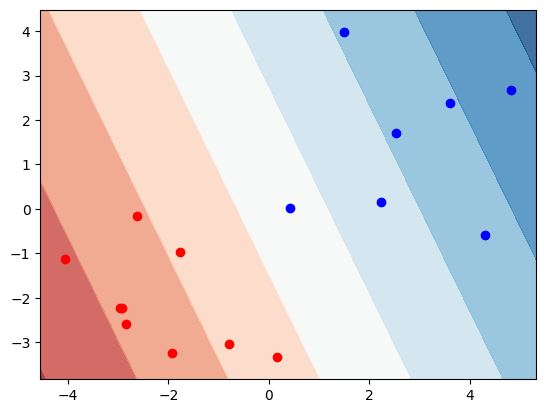

In [23]:
# Part II - Find classifier using subset of labeled data (i.e. just X_L,y_L)
classifier = SVC(kernel="linear", C=0.025, random_state=42)

print(X_L.shape )
print(y_L.shape)

classifier.fit(X_L,y_L)

ax = plt.subplot()
cm = plt.cm.RdBu
DecisionBoundaryDisplay.from_estimator(
            classifier, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

ax.plot(X[:9,0], X[:9,1], 'rs', marker='o')
ax.plot(X[10:17,0], X[10:17,1], 'bs', marker='o')
plt.show()

In [24]:
# Part III - Find classifier using semi-supervised wrapper method (i.e. X_L,y_L, and X_U)




In [25]:
# Show the classifier boundaries for all of these on a single plot